In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

df = pd.read_csv("heart.csv") 
x = df.drop(columns="target")
y = df["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(eval_metric="logloss", random_state=42)

stacking_model = StackingClassifier(
    estimators=[("rf", rf_model), ("xgb", xgb_model)],
    final_estimator=LogisticRegression(max_iter=200),
    passthrough=True
)

rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(x_train_scaled, y_train)

best_rf_model = rf_grid_search.best_estimator_

xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, cv=5, scoring='accuracy')
xgb_grid_search.fit(x_train_scaled, y_train)

best_xgb_model = xgb_grid_search.best_estimator_

stacking_model = StackingClassifier(
    estimators=[("rf", best_rf_model), ("xgb", best_xgb_model)],
    final_estimator=LogisticRegression(max_iter=200),
    passthrough=True
)

stacking_model.fit(x_train_scaled, y_train)

rf_preds = best_rf_model.predict(x_test_scaled)
xgb_preds = best_xgb_model.predict(x_test_scaled)
stacking_preds = stacking_model.predict(x_test_scaled)

rf_acc = accuracy_score(y_test, rf_preds)
xgb_acc = accuracy_score(y_test, xgb_preds)
stacking_acc = accuracy_score(y_test, stacking_preds)

print("Random Forest Report:\n", classification_report(y_test, rf_preds))
print("XGBoost Report:\n", classification_report(y_test, xgb_preds))
print("Stacking Report:\n", classification_report(y_test, stacking_preds))

print(f"Random Forest Accuracy: {rf_acc:}")
print(f"XGBoost Accuracy: {xgb_acc:}")
print(f"Stacking Model Accuracy: {stacking_acc:}")

Random Forest Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

XGBoost Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

Stacking Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg    

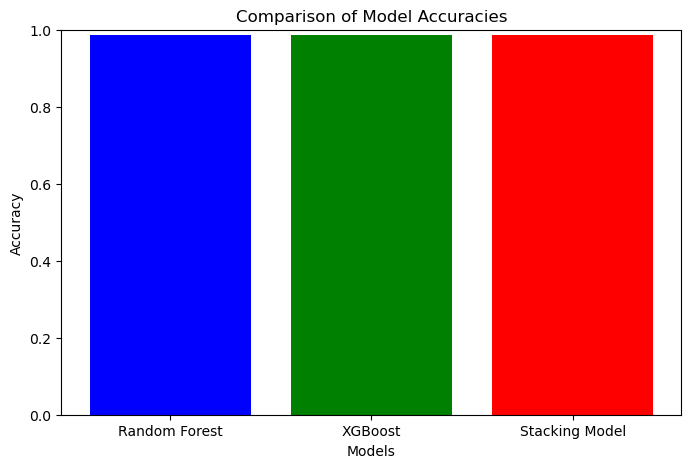

In [3]:
models = ["Random Forest", "XGBoost", "Stacking Model"]
accuracies = [rf_acc, xgb_acc, stacking_acc]
plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.title("Comparison of Model Accuracies")
plt.show()

In [5]:
# By creating synthetic data
import numpy as np
np.random.seed(42)
num_samples=1000
df=pd.DataFrame({
    'age': np.random.randint(29, 77, num_samples),
    'sex': np.random.choice([0, 1], num_samples),
    'cp': np.random.choice([0, 1, 2, 3], num_samples),
    'trestbps': np.random.randint(94, 200, num_samples),
    'chol': np.random.randint(126, 564, num_samples),
    'fbs': np.random.choice([0, 1], num_samples),
    'restecg': np.random.choice([0, 1, 2], num_samples),
    'thalach': np.random.randint(71, 202, num_samples),
    'exang': np.random.choice([0, 1], num_samples),
    'oldpeak': np.random.uniform(0.0, 6.2, num_samples),
    'slope': np.random.choice([0, 1, 2], num_samples),
    'ca': np.random.choice([0, 1, 2, 3], num_samples),
    'thal': np.random.choice([1, 2, 3], num_samples),
    'target': np.random.choice([0, 1], num_samples)
})
x = df.drop(columns="target")
y = df["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(eval_metric="logloss", random_state=42)

stacking_model = StackingClassifier(
    estimators=[("rf", rf_model), ("xgb", xgb_model)],
    final_estimator=LogisticRegression(max_iter=200),
    passthrough=True
)

rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(x_train_scaled, y_train)

best_rf_model = rf_grid_search.best_estimator_

xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, cv=5, scoring='accuracy')
xgb_grid_search.fit(x_train_scaled, y_train)

best_xgb_model = xgb_grid_search.best_estimator_

stacking_model = StackingClassifier(
    estimators=[("rf", best_rf_model), ("xgb", best_xgb_model)],
    final_estimator=LogisticRegression(max_iter=200),
    passthrough=True
)

stacking_model.fit(x_train_scaled, y_train)

rf_preds = best_rf_model.predict(x_test_scaled)
xgb_preds = best_xgb_model.predict(x_test_scaled)
stacking_preds = stacking_model.predict(x_test_scaled)

rf_acc = accuracy_score(y_test, rf_preds)
xgb_acc = accuracy_score(y_test, xgb_preds)
stacking_acc = accuracy_score(y_test, stacking_preds)

print("Random Forest Report:\n", classification_report(y_test, rf_preds))
print("XGBoost Report:\n", classification_report(y_test, xgb_preds))
print("Stacking Report:\n", classification_report(y_test, stacking_preds))

print(f"Random Forest Accuracy: {rf_acc:}")
print(f"XGBoost Accuracy: {xgb_acc:}")
print(f"Stacking Model Accuracy: {stacking_acc:}")

Random Forest Report:
               precision    recall  f1-score   support

           0       0.41      0.62      0.50        84
           1       0.57      0.36      0.44       116

    accuracy                           0.47       200
   macro avg       0.49      0.49      0.47       200
weighted avg       0.50      0.47      0.46       200

XGBoost Report:
               precision    recall  f1-score   support

           0       0.39      0.61      0.47        84
           1       0.52      0.31      0.39       116

    accuracy                           0.43       200
   macro avg       0.46      0.46      0.43       200
weighted avg       0.47      0.43      0.42       200

Stacking Report:
               precision    recall  f1-score   support

           0       0.42      0.70      0.52        84
           1       0.57      0.28      0.38       116

    accuracy                           0.46       200
   macro avg       0.49      0.49      0.45       200
weighted avg    

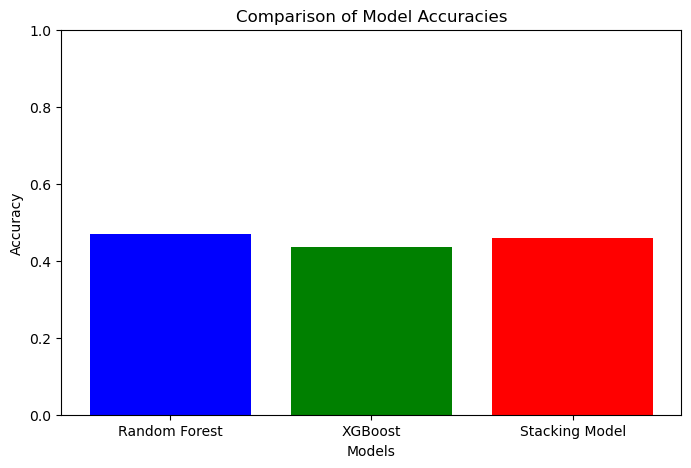

In [7]:
models = ["Random Forest", "XGBoost", "Stacking Model"]
accuracies = [rf_acc, xgb_acc, stacking_acc]
plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.title("Comparison of Model Accuracies")
plt.show()